# Decision Trees, Random Forest, and Logistic Regression

DataDource: https://www.kaggle.com/rakeshrau/social-network-ads

Dataset tells which of the users purchased/not purchased a particular product.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline

In [93]:
df = pd.read_csv('../dataset/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [94]:
#userid is not usefull so should be dropped
df.drop(['User ID'], axis=1, inplace=True)
#df.drop(df.columns[[0, 1, 3]], axis=1)

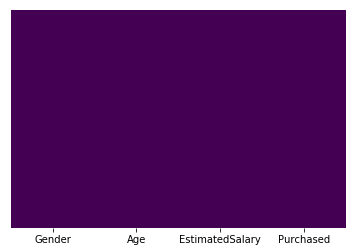

In [95]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [96]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
# only used for Type column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df[['Gender']])
#df = df.apply(labelencoder.fit_transform) # multicolumn encoding
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
df.head()

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


/Users/mk194903/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mk194903/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/mk194903/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

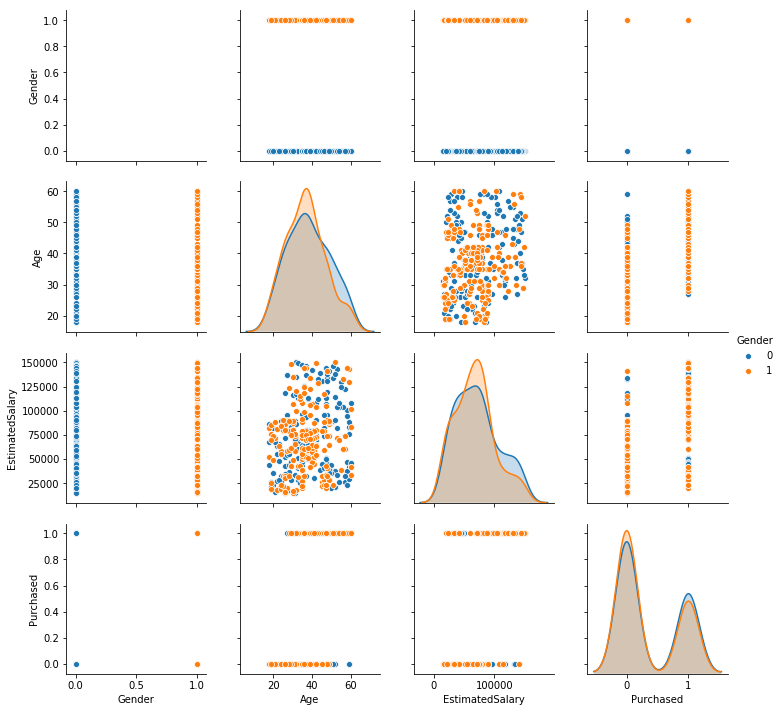

In [97]:
# to see pattern
sns.pairplot(data=df, hue="Gender")

In [98]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [99]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

# Decision Tree

In [100]:
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
y_pred = classifier.predict(X_test)

In [102]:
classifier.feature_importances_

array([0.02899418, 0.45516263, 0.51584319])

### Validation

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[60,  5],
       [ 8, 27]])

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.84      0.77      0.81        35

   micro avg       0.87      0.87      0.87       100
   macro avg       0.86      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



In [105]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  87.0


### Tree Visualization

In [106]:
#install
#conda install -c https://conda.binstar.org/sstromberg pydot
#conda install GraphViz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['Gender', 'Age', 'EstimatedSalary']

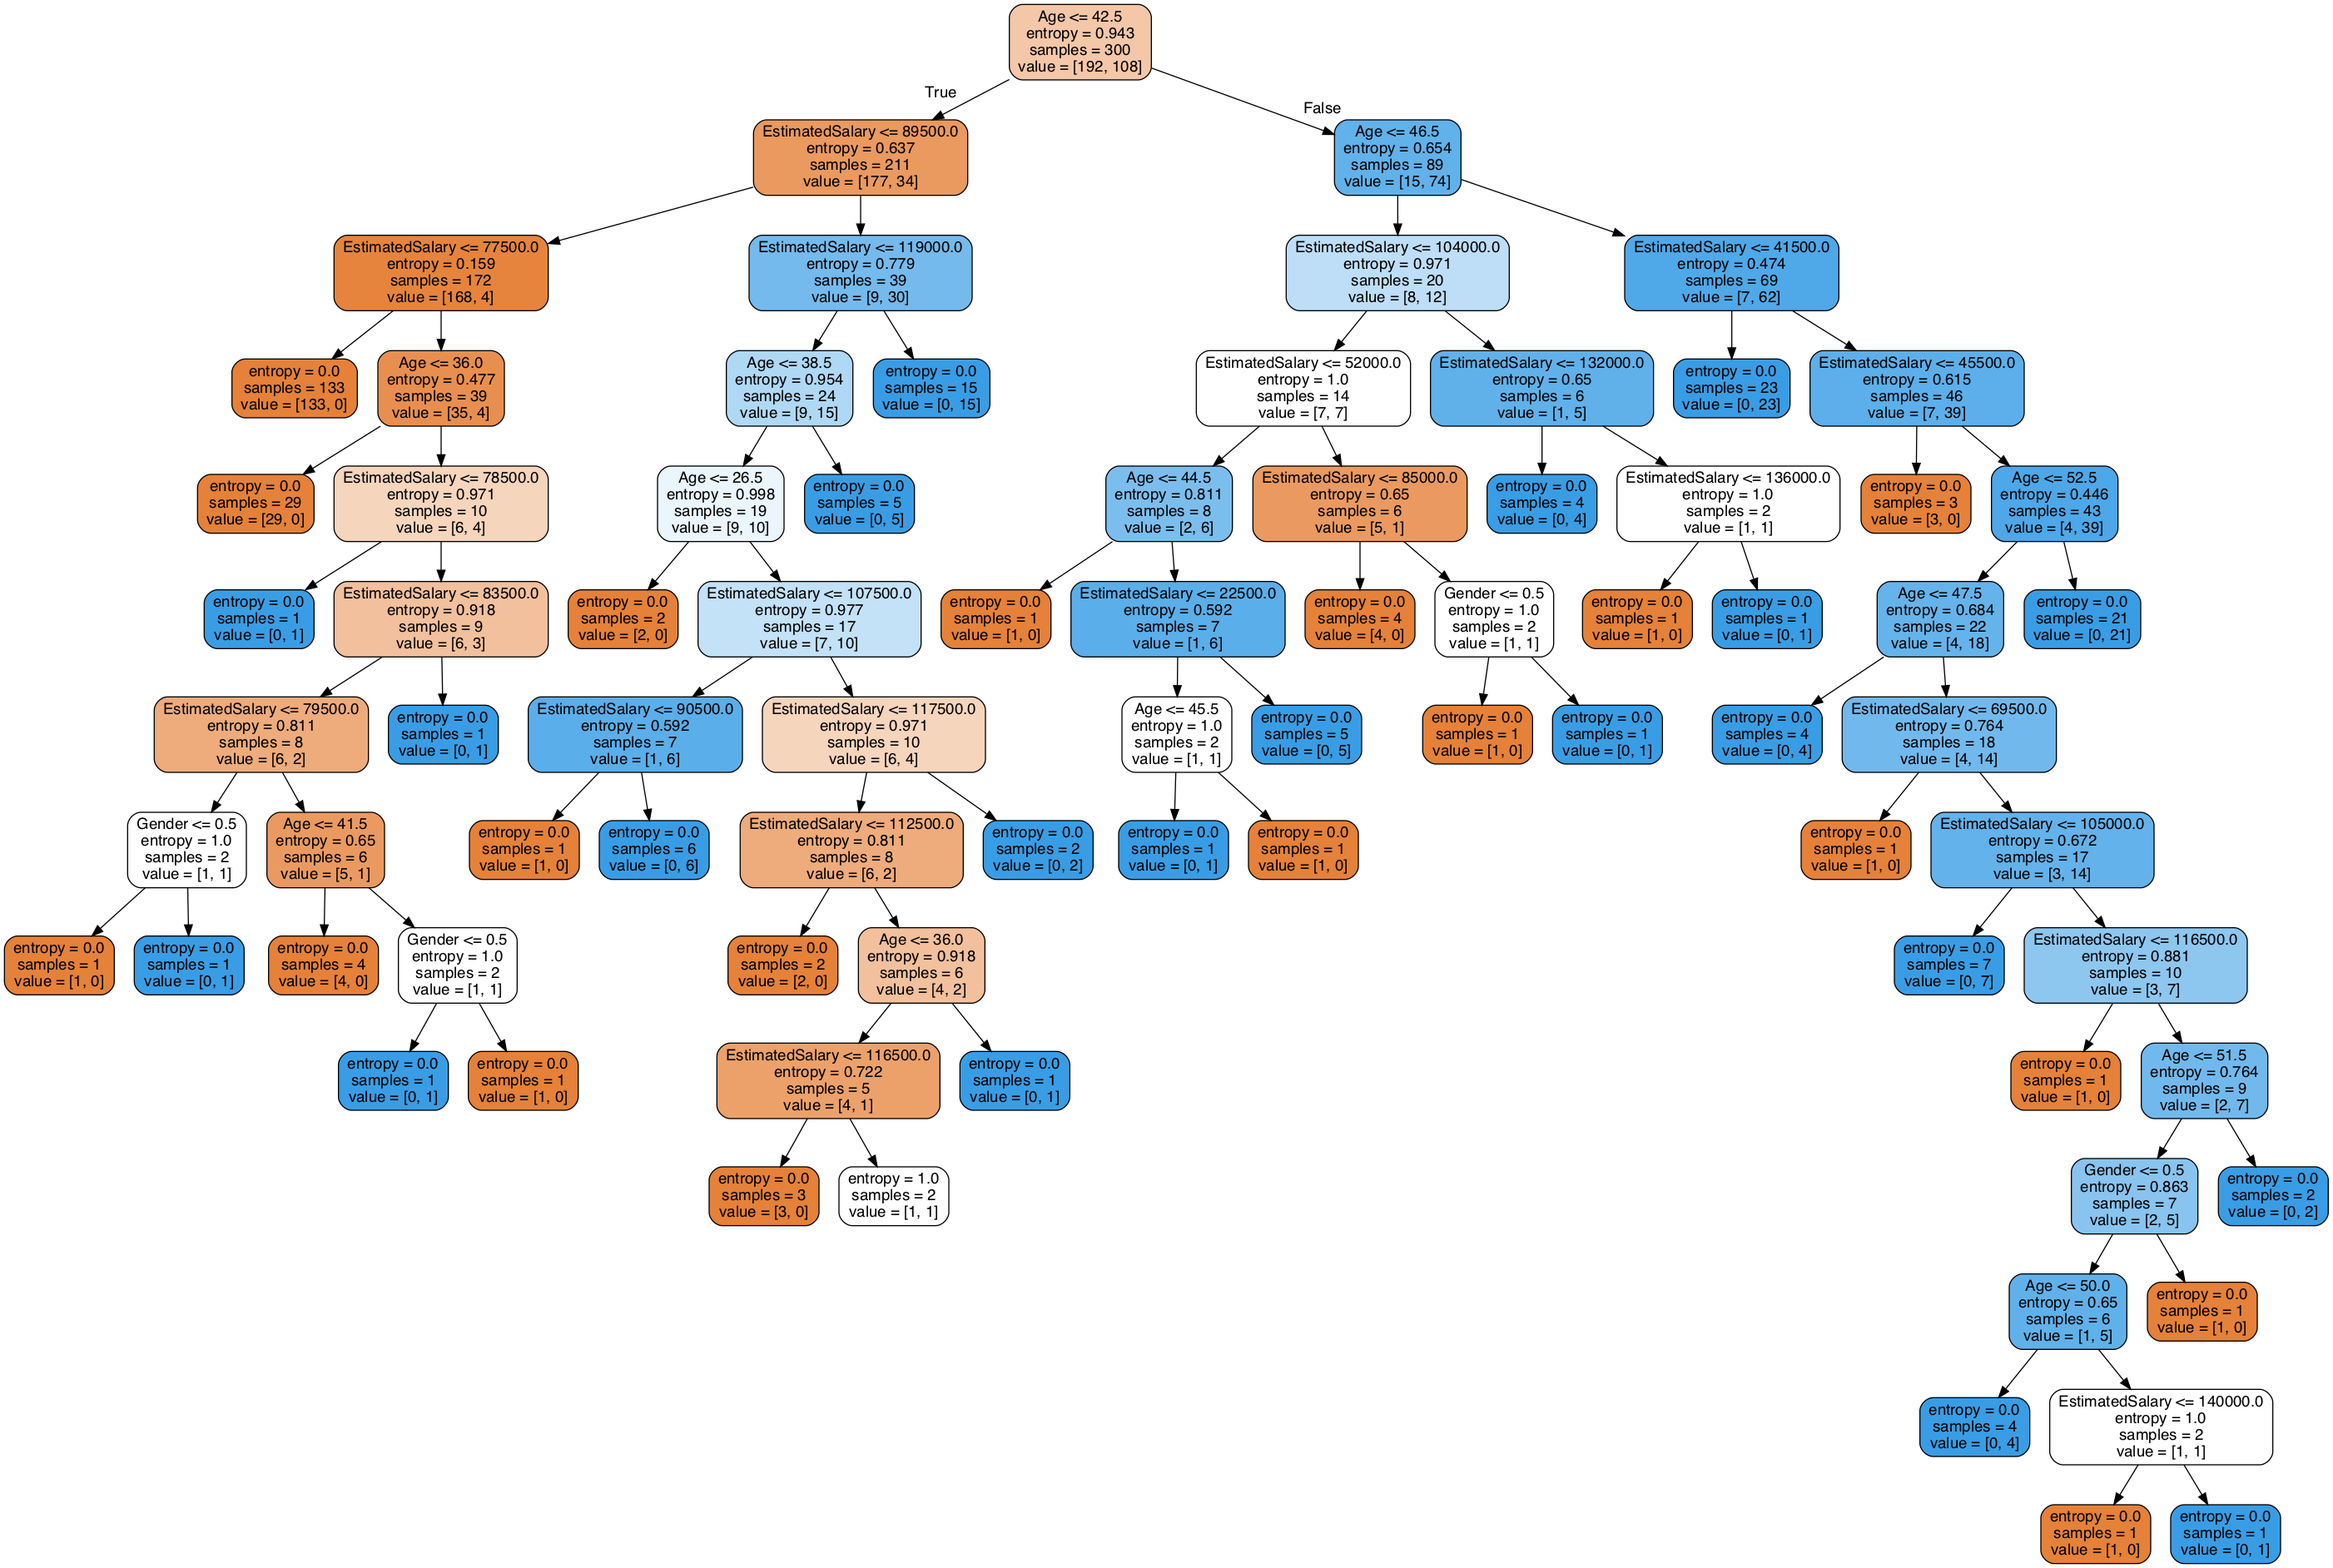

In [107]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
rfc_pred = rfc.predict(X_test)

In [110]:
rfc.feature_importances_

array([0.0111526 , 0.51921174, 0.46963566])

In [111]:
print(confusion_matrix(y_test,rfc_pred))

[[62  3]
 [ 6 29]]


In [112]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        65
           1       0.91      0.83      0.87        35

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [113]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,rfc_pred)*100)

Accuracy :  91.0


In [114]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,rfc_pred) #y_target, y_pred

0.09

In [115]:
# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,rfc_pred) #y_target, y_pred

0.09

In [116]:
# Log Loss  - Should be close to 0
from sklearn.metrics import log_loss
log_loss(y_test,rfc_pred)

3.108513863464867

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
predictions = logmodel.predict(X_test)

### Evaluation

In [70]:
print(confusion_matrix(y_test,predictions))

[[65  0]
 [35  0]]


In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        65
           1       0.00      0.00      0.00        35

   micro avg       0.65      0.65      0.65       100
   macro avg       0.33      0.50      0.39       100
weighted avg       0.42      0.65      0.51       100



/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [72]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)

Accuracy :  65.0


**precision**
Measures the fraction(ratio) of actual positives among those examples that are predicted as positive. 
The best value is 1 and the worst value is 0.
Precision = tp / (tp + fp)

**recall**
Measures the fraction of actual positives that are predicted as positive. The recall is intuitively the ability of the classifier to find all the positive samples.
The best value is 1 and the worst value is 0.
Recall = tp / (tp + fn)

**f1-score also known as balanced F-score or F-measure**
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 x (precision x recall) / (precision + recall)

----
**Accuracy (ACC)** 
Measures the fraction(ratio) of correct predictions. 
The best value is 1 and the worst value is 0.
Accuracy = TP+TN / (TP+TN+FP+FN)

<img src="../dataset/ConfusionMatrix.png">

#### Binary Classification Loss Functions
<img src="../dataset/LossFunctions1.png">

In [73]:
# MAE L1 loss - Should be close to 0
from sklearn.metrics import mean_absolute_error  
mean_absolute_error(y_test,predictions) #y_target, y_pred

0.35

In [74]:
# MSE L2 loss - Should be close to 0
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,predictions) #y_target, y_pred

0.35

In [75]:
from sklearn.metrics import log_loss
log_loss(y_test,predictions)

12.08857173821874

# SVM

In [76]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [78]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  2]
 [30  5]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80        65
           1       0.71      0.14      0.24        35

   micro avg       0.68      0.68      0.68       100
   macro avg       0.70      0.56      0.52       100
weighted avg       0.69      0.68      0.60       100



In [80]:
#from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  68.0


## Model Selection

In [81]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.6671857619577308

In [82]:
accuracies.std()

0.03721340951432199

In [86]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.5]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
x_t_h = X_train.head(20)# Taking head so I can run fast. In real world remove head
y_t_h = y_train.head(20)

In [87]:
grid_search = grid_search.fit(x_t_h, y_t_h) # Taking head so I can run fast. In real world remove head

In [89]:
best_accuracy = grid_search.best_score_
best_accuracy

0.7

In [90]:
best_parameters = grid_search.best_params_  # Best parameter to select in model training
best_parameters 

{'C': 1, 'kernel': 'linear'}

Model Predicts user purchased or not.

Thank You!